In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
kc_data = pd.read_csv("/Users/selinwork/Documents/Ironhack/Ironhack_Week_5/Project_IronKaggle/king_ country_ houses_aa.csv")

In [3]:
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# to fix the columns names
kc_data.columns = kc_data.columns.str.lower().str.replace(' ', '_')

In [5]:
df = kc_data.copy()

In [6]:
# Ensure 'date' is in datetime format
df["date"] = pd.to_datetime(df["date"], errors='coerce')

# Create 'year_month' column as a numerical format
df['year_month'] = df['date'].dt.year * 100 + df['date'].dt.month

# Drop the original 'date' column
df = df.drop(columns=['date','id'])

In [7]:
df.rename(columns={'year_month': 'date'}, inplace=True)


In [8]:
df['price_per_sqft'] = round(df['price'] / df['sqft_living'], 2)

In [9]:
target = df.pop("price")
df["price"] = target
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price_per_sqft,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,1955,0,98178,47.5112,-122.257,1340,5650,201410,188.05,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1951,1991,98125,47.7210,-122.319,1690,7639,201412,209.34,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,1933,0,98028,47.7379,-122.233,2720,8062,201502,233.77,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,1965,0,98136,47.5208,-122.393,1360,5000,201412,308.16,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,1987,0,98074,47.6168,-122.045,1800,7503,201502,303.57,510000.0


In [11]:
df.corrwith(df["price"]).sort_values(ascending=False)

price             1.000000
sqft_living       0.702035
grade             0.667434
sqft_above        0.605567
sqft_living15     0.585379
price_per_sqft    0.554703
bathrooms         0.525138
view              0.397293
sqft_basement     0.323816
bedrooms          0.308350
lat               0.307003
waterfront        0.266369
floors            0.256794
yr_renovated      0.126434
sqft_lot          0.089661
sqft_lot15        0.082447
yr_built          0.054012
condition         0.036362
long              0.021626
date              0.003061
zipcode          -0.053203
dtype: float64

In [12]:
num_corr = round(df.corr(), 2   )

In [14]:
import numpy as np
import plotly.graph_objects as go

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Apply the mask by replacing the upper triangle values with NaN
masked_corr = corr_matrix.mask(mask)

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
    z=masked_corr.values,
    x=masked_corr.columns,
    y=masked_corr.columns,
    colorscale=[
        [0, "#E3F2FD"],  # Very light blue
        [0.25, "#90CAF9"],  # Light blue
        [0.5, "#42A5F5"],  # Moderate blue
        [0.75, "#1976D2"],  # Deep blue
        [1, "#0D47A1"]  # Darkest blue
    ],
    zmin=-1, zmax=1,
    colorbar=dict(title="Correlation")
))

# Add numerical annotations for only the lower triangle
for i in range(len(masked_corr.columns)):
    for j in range(len(masked_corr.columns)):
        if not mask[i, j]:  # Annotate only for lower triangle
            fig.add_annotation(
                x=masked_corr.columns[j],
                y=masked_corr.columns[i],
                text=f"{masked_corr.iloc[i, j]:.2f}",
                showarrow=False,
                font=dict(color="black", size=10)
            )

# Update layout
fig.update_layout(
    title="Lower Triangle Correlation Matrix Heatmap",
    xaxis=dict(tickangle=45),
    width=1000,
    height=800
)

fig.show()

In [40]:
num = df.select_dtypes(include='number')
cat = df.select_dtypes(include='object')

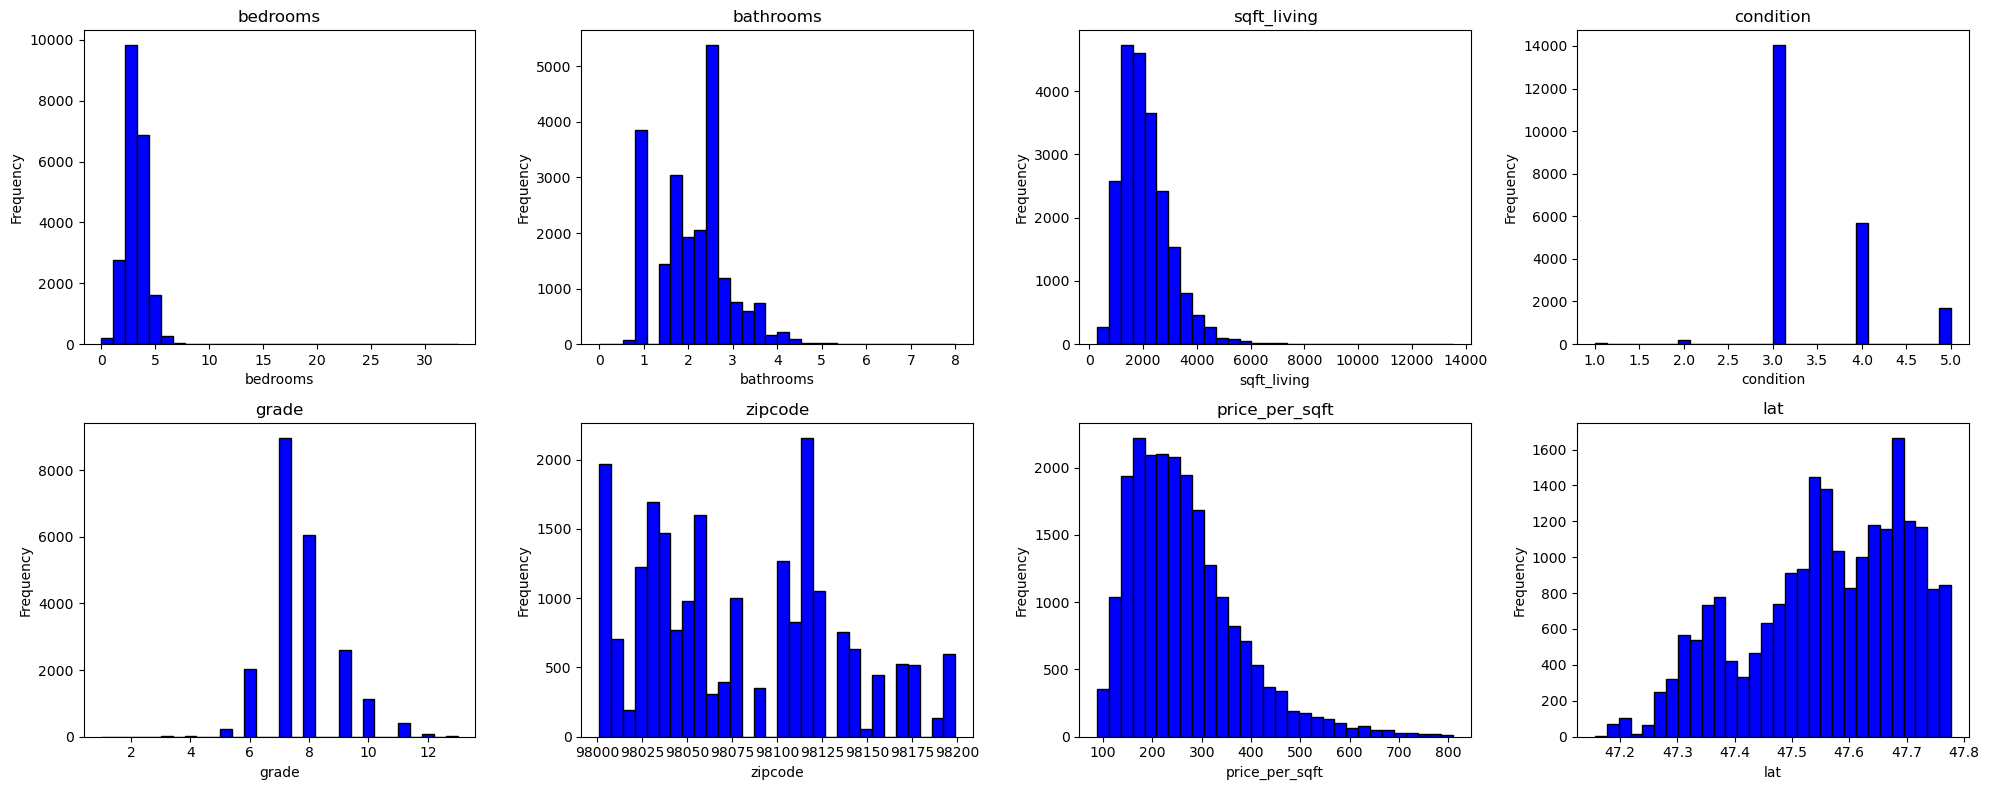

In [17]:
color = '#0000FF'

# Select only numerical columns
selected_df = df[["bedrooms", "bathrooms", "sqft_living", "condition", "grade","zipcode", "price_per_sqft","lat"]]
n_features = selected_df.shape[1]
ncols = 4  # Adjust per row
nrows = (n_features + ncols - 1) // ncols  # Calculate needed rows dynamically

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 4))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= n_features:
        ax.set_visible(False)
        continue
    ax.hist(selected_df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(selected_df.columns[i])
    ax.set_xlabel(selected_df.columns[i])
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [42]:
round(num.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
bedrooms,21613.0,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.0,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.0,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.0,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.0,1.49,0.54,1.00,1.00,1.50,2.00,3.50
waterfront,21613.0,0.01,0.09,0.00,0.00,0.00,0.00,1.00
view,21613.0,0.23,0.77,0.00,0.00,0.00,0.00,4.00
condition,21613.0,3.41,0.65,1.00,3.00,3.00,4.00,5.00
grade,21613.0,7.66,1.18,1.00,7.00,7.00,8.00,13.00
sqft_above,21613.0,1788.39,828.09,290.00,1190.00,1560.00,2210.00,9410.00


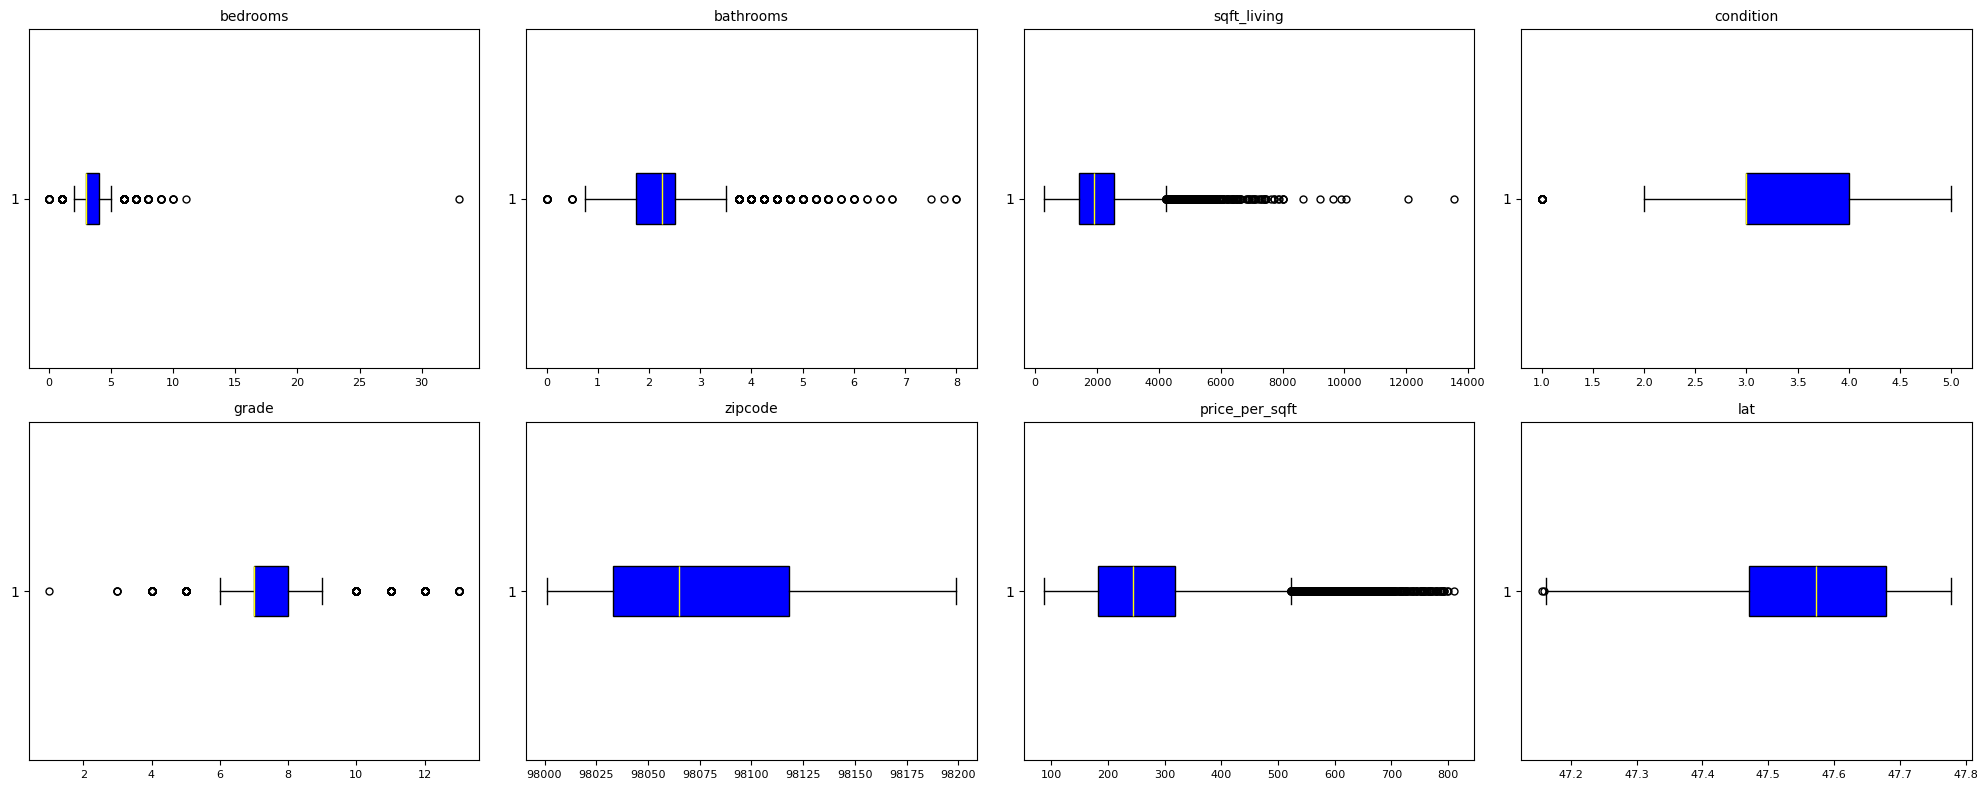

In [23]:
# Choose selected_df columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 4))
axes = axes.flatten()

# Plot boxplots for selected columns
for i, ax in enumerate(axes):
    if i >= len(selected_columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df[selected_columns[i]].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(selected_columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

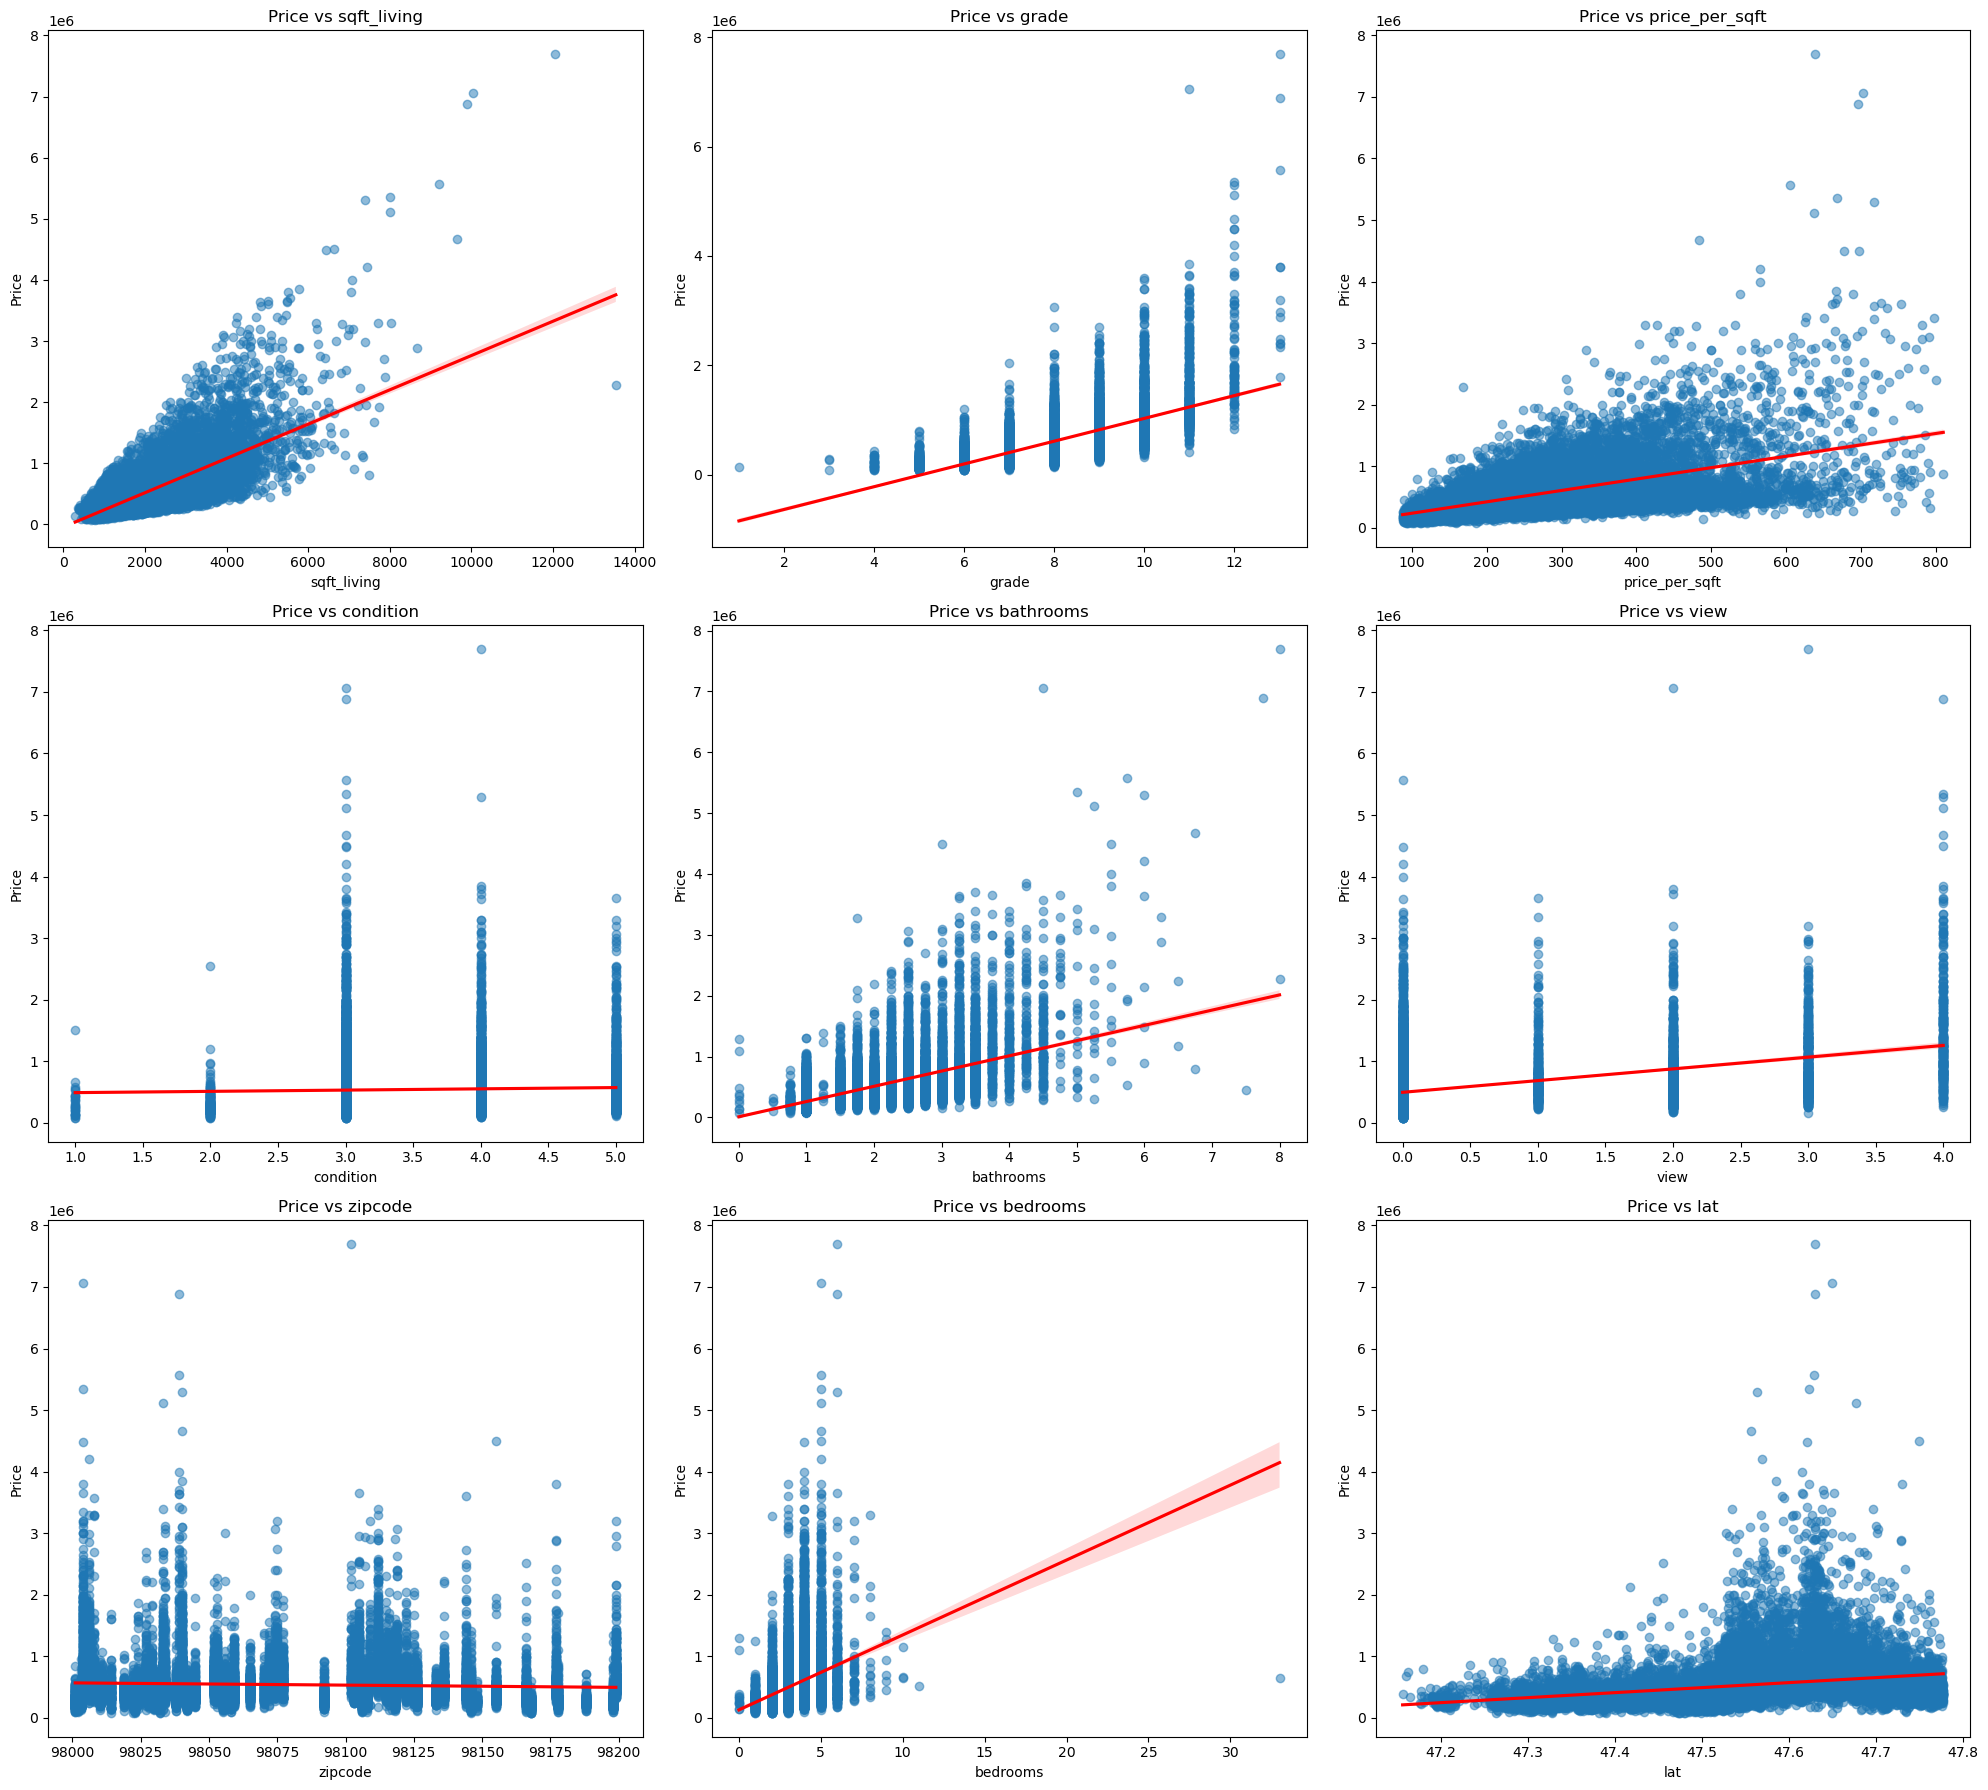

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features of interest
features = [
    "sqft_living", "grade", "price_per_sqft",
    "condition", "bathrooms", "view", "zipcode", "bedrooms", "lat"
]

# Create a grid: 3 plots per row
ncols = 3
nrows = (len(features) + ncols - 1) // ncols  # Calculate the number of rows dynamically

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 6))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Plot each feature vs price
for i, feature in enumerate(features):
    sns.regplot(
        x=df[feature],
        y=df["price"],
        ax=axes[i],
        scatter_kws={"alpha": 0.5},
        line_kws={"color": "red"}
    )
    axes[i].set_title(f"Price vs {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Price")

# Hide unused subplots
for j in range(len(features), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [45]:
df['plot_date'] = pd.to_datetime(df['date'], format='%Y%m')
df_grouped = df.groupby('plot_date')['price'].mean().reset_index()
df_grouped.rename(columns={'price': 'avg_price'}, inplace=True)


In [46]:
import plotly.express as px

# Create the plot using the cleaned data
fig = px.line(df_grouped, x='plot_date', y='avg_price', title='Price Appreciation Over Time')
fig.update_xaxes(title_text='Year-Month')
fig.update_yaxes(title_text='Average Price')
fig.show()

In [47]:
df_features = df.groupby('price_per_sqft')["grade"].mean().reset_index()


In [48]:
import plotly.express as px

fig = px.scatter(df, x='price_per_sqft', y='grade', 
                 color='grade', size='price_per_sqft',
                 title="Grade vs Price Per Square Foot",
                 labels={'price_per_sqft': 'Price Per Sqft', 'grade': 'Grade'})
fig.update_traces(marker=dict(opacity=0.6))
fig.show()

                       Price Range  Count  Percentage
price_segment                                        
segment_1        300,000 - 600,000   4570   21.144681
segment_2         75,000 - 300,000  10787   49.909777
segment_3        600,000 - 900,000   4221   19.529913
segment_4      900,000 - 7,700,000   2035    9.415629


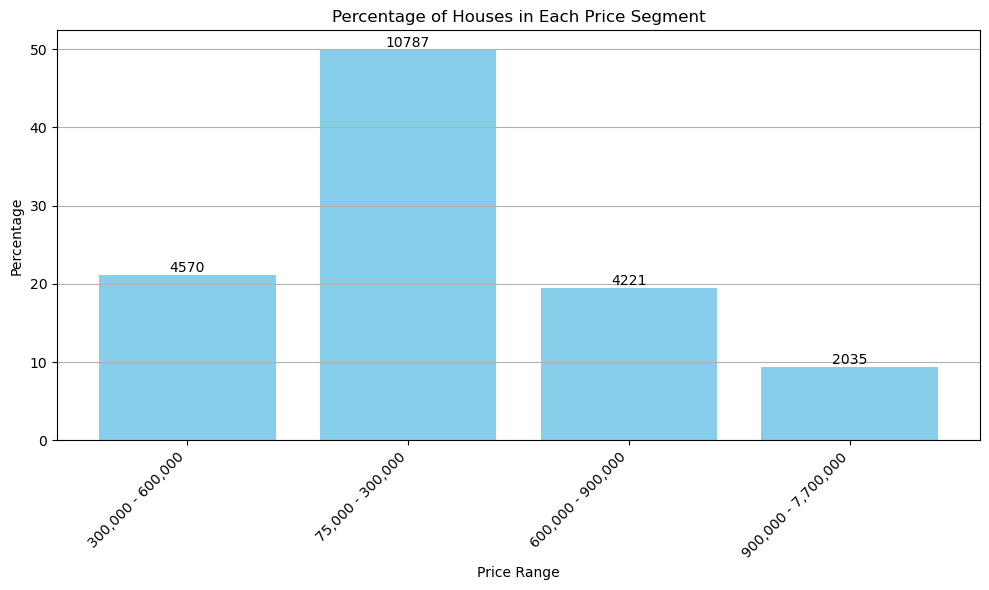

In [27]:
# Define the bins and labels for price segmentation
price_bins = [75000, 300000, 600000, 900000, df['price'].max()]
price_labels = ['segment_1', 'segment_2', 'segment_3', 'segment_4']
df_segment = df.copy()

# Create a new column for price segments
df_segment['price_segment'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, include_lowest=True)

# Count the number of houses in each segment
segment_counts = df_segment['price_segment'].value_counts()

# Calculate percentages for each segment
segment_percentages = (segment_counts / len(df_segment)) * 100

# Define price ranges for each segment
price_ranges = [f"{int(price_bins[i]):,} - {int(price_bins[i+1]):,}" for i in range(len(price_bins)-1)]

# Combine counts, percentages, and price ranges into a summary DataFrame
segment_summary = pd.DataFrame({
    'Price Range': price_ranges,
    'Count': segment_counts,
    'Percentage': segment_percentages
}).sort_index()

# Display the summary
print(segment_summary)

# Optional: Visualize the segments with a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(segment_summary['Price Range'], segment_summary['Percentage'], color='skyblue')

# Add text annotations for the counts on top of the bars
for bar, count in zip(bars, segment_summary['Count']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(count), ha='center', va='bottom')

plt.title('Percentage of Houses in Each Price Segment')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()